<a href="https://colab.research.google.com/github/albertocj1/CCMACLRL_EXAM/blob/main/MIDTERM_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


In [747]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/train.csv?raw=true'
df = pd.read_csv(dataset_url)

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [748]:
dfisnull = df.isnull().sum()
dfisnull

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [749]:
imputer = SimpleImputer(strategy='most_frequent')
df['fuel_type'] = imputer.fit_transform(df[['fuel_type']]).ravel()
df['accident'] = imputer.fit_transform(df[['accident']]).ravel()
df['clean_title'] = imputer.fit_transform(df[['clean_title']]).ravel()


In [750]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [751]:
value_counts = df['int_col'].value_counts()

# Optionally set display option to see more rows
pd.set_option('display.max_rows', None)  # None means no limit

print(value_counts)

int_col
Black                         107674
Beige                          24495
Gray                           21204
Brown                           5810
Red                             5145
White                           4743
–                               4527
Jet Black                       2398
Ebony                           1833
Orange                           932
Blue                             743
Global Black                     628
Silver                           429
Nero Ade                         389
Gold                             367
Black / Express Red              326
Black Onyx                       256
Graphite                         254
Rioja Red                        244
Diesel Gray / Black              223
Charcoal                         210
Green                            195
Medium Stone                     170
Medium Earth Gray                170
Parchment                        169
Sandstone                        159
Satin Black                   

In [752]:
label_encoder = LabelEncoder()
df['brand'] = label_encoder.fit_transform(df['brand'])
df['model'] = label_encoder.fit_transform(df['model'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['engine'] = label_encoder.fit_transform(df['engine'])
df['ext_col'] = label_encoder.fit_transform(df['ext_col'])
df['int_col'] = label_encoder.fit_transform(df['int_col'])

In [753]:
df = pd.get_dummies(df, columns=['fuel_type', 'accident', 'clean_title'], drop_first=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   id                        188533 non-null  int64
 1   brand                     188533 non-null  int64
 2   model                     188533 non-null  int64
 3   model_year                188533 non-null  int64
 4   milage                    188533 non-null  int64
 5   engine                    188533 non-null  int64
 6   transmission              188533 non-null  int64
 7   ext_col                   188533 non-null  int64
 8   int_col                   188533 non-null  int64
 9   price                     188533 non-null  int64
 10  fuel_type_E85 Flex Fuel   188533 non-null  bool 
 11  fuel_type_Gasoline        188533 non-null  bool 
 12  fuel_type_Hybrid          188533 non-null  bool 
 13  fuel_type_Plug-In Hybrid  188533 non-null  bool 
 14  fuel_type_not suppor

In [754]:
df.drop(['id', 'ext_col','int_col'], axis=1, inplace=True)
df.head()

,brand,model,model_year,milage,engine,transmission,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_None reported
0,31,495,2007,213000,116,38,4200,False,True,False,False,False,False,True
1,28,930,2002,143250,366,38,4999,False,True,False,False,False,False,False
2,9,1575,2002,136731,640,38,13900,True,False,False,False,False,False,True
3,16,758,2017,19500,863,49,45000,False,True,False,False,False,False,True
4,36,1077,2021,7388,259,23,97500,False,True,False,False,False,False,True


In [755]:
for column in df.columns:
  if pd.api.types.is_bool_dtype(df[column]):
    df[column] = df[column].astype(int)

# Display the updated DataFrame info
df.head()


,brand,model,model_year,milage,engine,transmission,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_None reported
0,31,495,2007,213000,116,38,4200,0,1,0,0,0,0,1
1,28,930,2002,143250,366,38,4999,0,1,0,0,0,0,0
2,9,1575,2002,136731,640,38,13900,1,0,0,0,0,0,1
3,16,758,2017,19500,863,49,45000,0,1,0,0,0,0,1
4,36,1077,2021,7388,259,23,97500,0,1,0,0,0,0,1


In [756]:
correlation = df.corr()

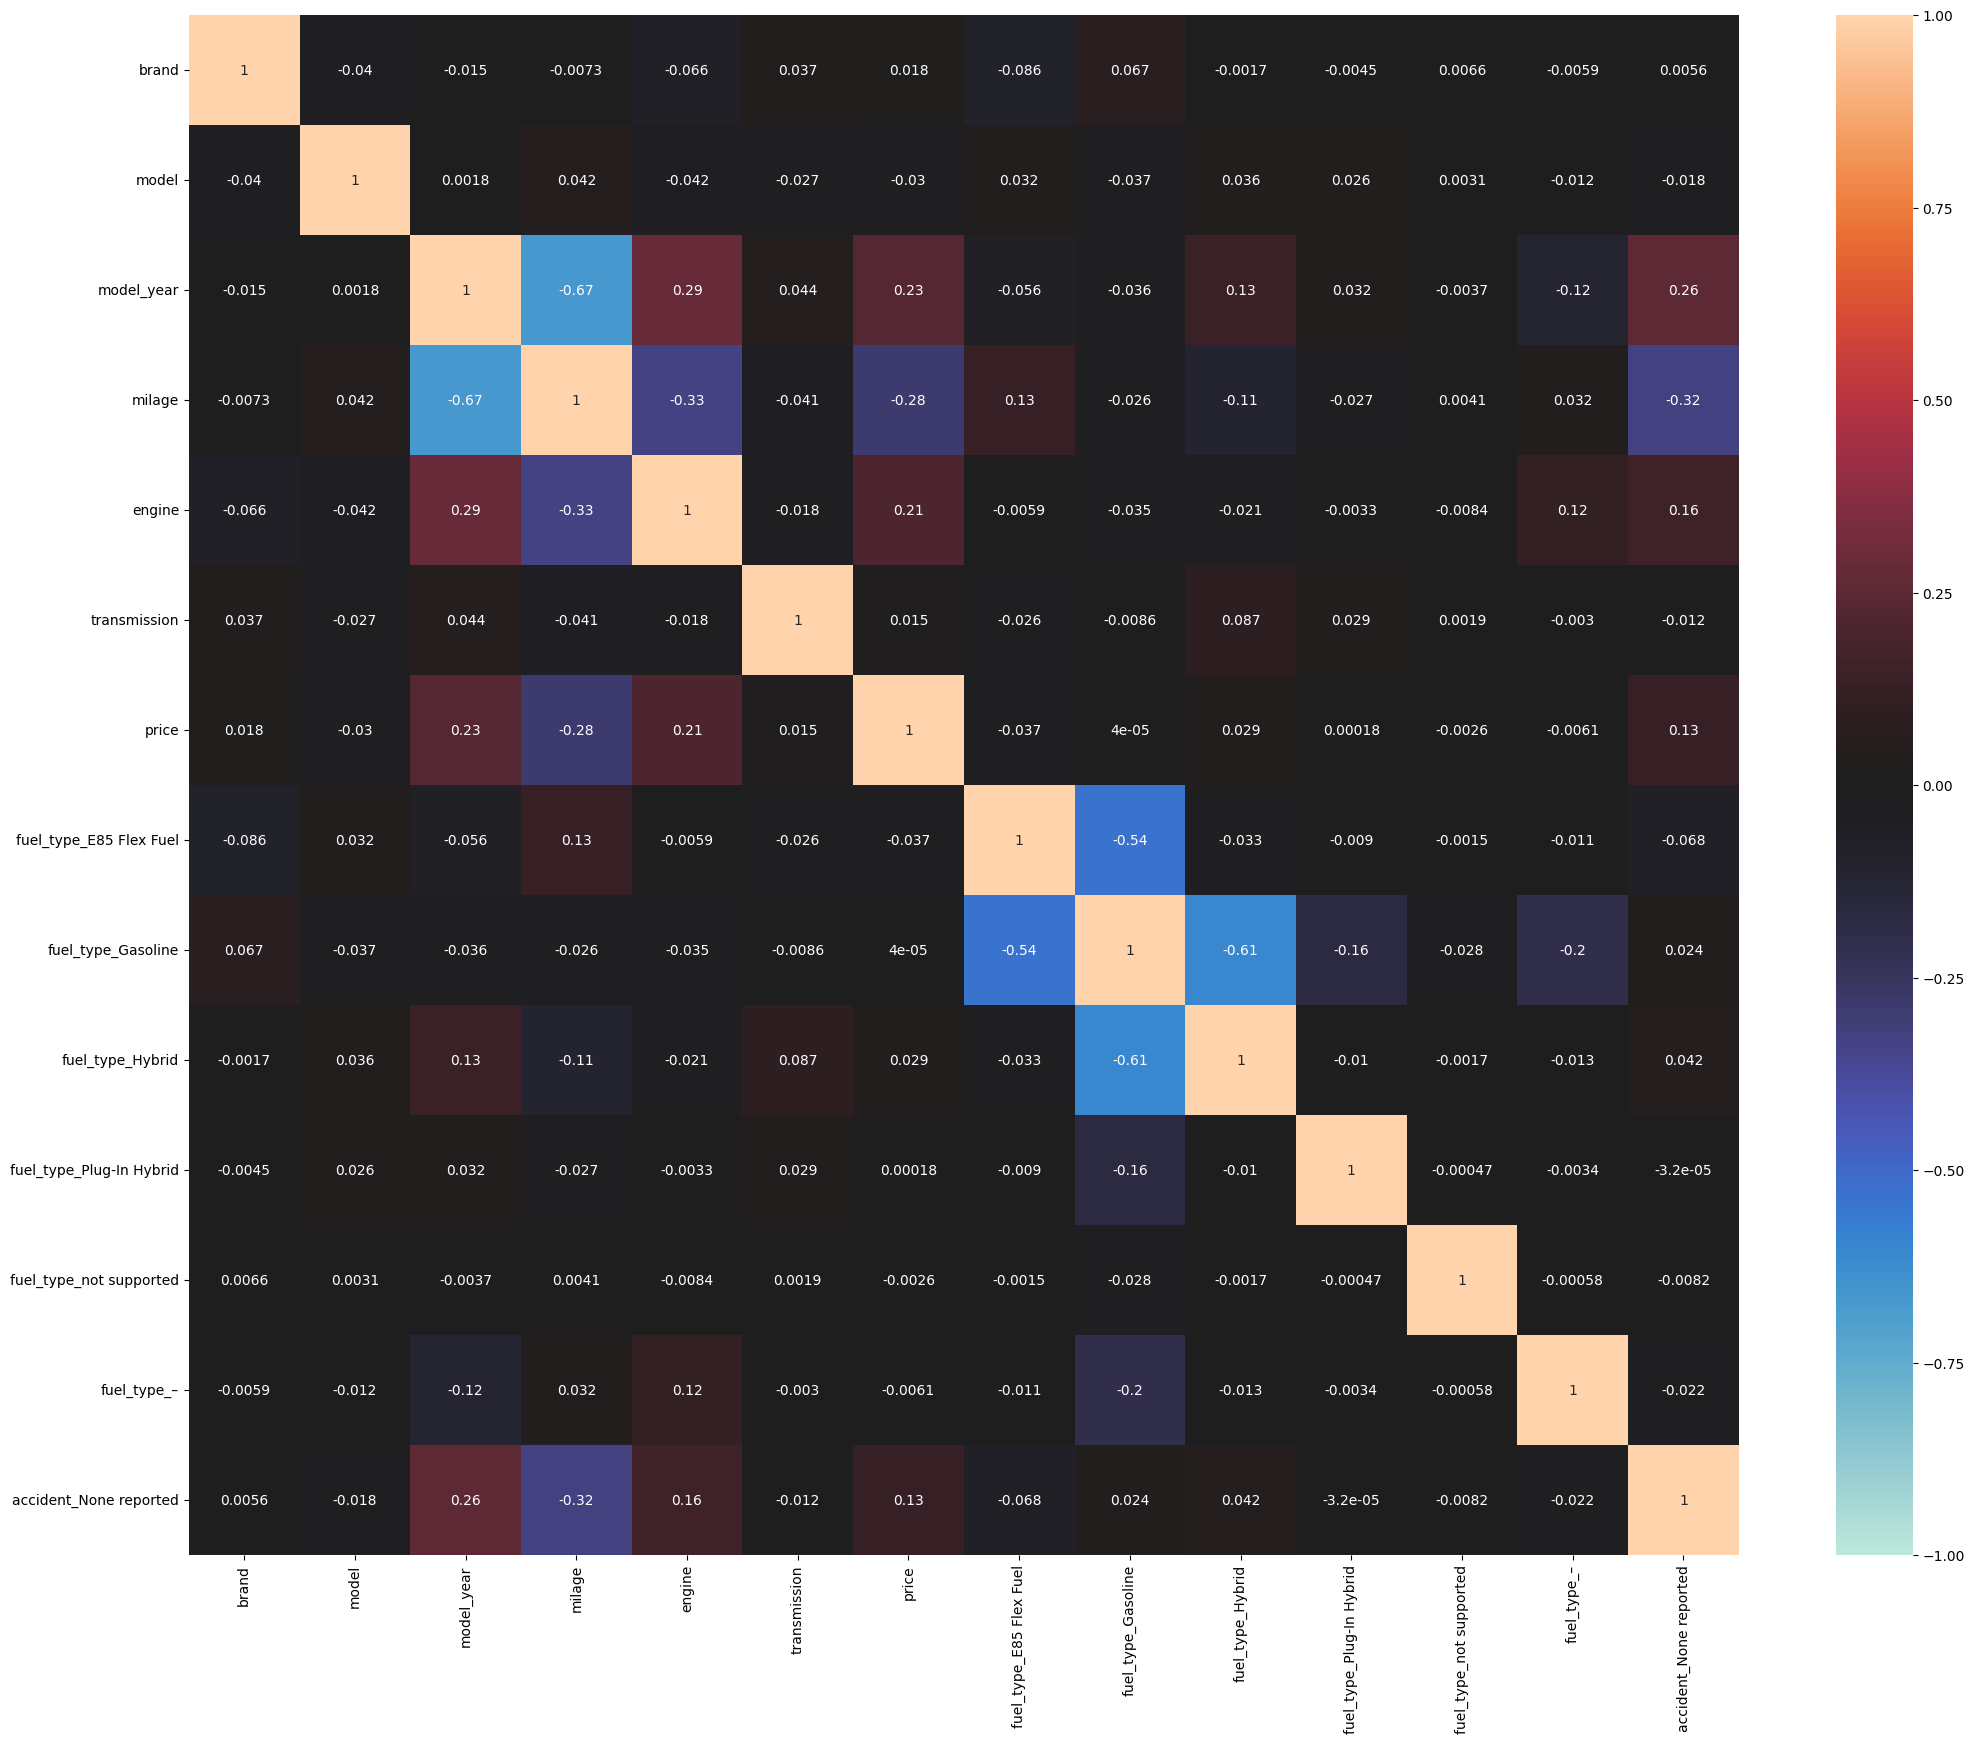

In [757]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [758]:
# Put your answer here
X = df.drop(['price', 'model', 'fuel_type_E85 Flex Fuel','fuel_type_Gasoline','fuel_type_–','fuel_type_not supported'],axis=1)
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [759]:
model = LinearRegression()

In [760]:
model.fit(X_train,y_train)

LinearRegression()

In [761]:
y_pred = model.predict(X_test)

In [762]:
mean_squared_error(y_test,y_pred, squared=False)

68389.99838224048

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   brand                     188533 non-null  int64
 1   model                     188533 non-null  int64
 2   model_year                188533 non-null  int64
 3   milage                    188533 non-null  int64
 4   engine                    188533 non-null  int64
 5   transmission              188533 non-null  int64
 6   price                     188533 non-null  int64
 7   fuel_type_E85 Flex Fuel   188533 non-null  int64
 8   fuel_type_Gasoline        188533 non-null  int64
 9   fuel_type_Hybrid          188533 non-null  int64
 10  fuel_type_Plug-In Hybrid  188533 non-null  int64
 11  fuel_type_not supported   188533 non-null  int64
 12  fuel_type_–               188533 non-null  int64
 13  accident_None reported    188533 non-null  int64
dtypes: int64(14)
memory 

In [764]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/test.csv?raw=true'
dt=pd.read_csv(test_url)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [765]:
label_encoder = LabelEncoder()
dt['brand'] = label_encoder.fit_transform(dt['brand'])
dt['model'] = label_encoder.fit_transform(dt['model'])
dt['transmission'] = label_encoder.fit_transform(dt['transmission'])
dt['engine'] = label_encoder.fit_transform(dt['engine'])
dt['ext_col'] = label_encoder.fit_transform(dt['ext_col'])
dt['int_col'] = label_encoder.fit_transform(dt['int_col'])


In [766]:
dt = pd.get_dummies(dt, columns=['fuel_type', 'accident', 'clean_title'], drop_first=True)
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   id                        125690 non-null  int64
 1   brand                     125690 non-null  int64
 2   model                     125690 non-null  int64
 3   model_year                125690 non-null  int64
 4   milage                    125690 non-null  int64
 5   engine                    125690 non-null  int64
 6   transmission              125690 non-null  int64
 7   ext_col                   125690 non-null  int64
 8   int_col                   125690 non-null  int64
 9   fuel_type_E85 Flex Fuel   125690 non-null  bool 
 10  fuel_type_Gasoline        125690 non-null  bool 
 11  fuel_type_Hybrid          125690 non-null  bool 
 12  fuel_type_Plug-In Hybrid  125690 non-null  bool 
 13  fuel_type_not supported   125690 non-null  bool 
 14  fuel_type_–         

In [767]:
dt.drop(['id','ext_col','int_col','model', 'fuel_type_E85 Flex Fuel','fuel_type_Gasoline','fuel_type_–','fuel_type_not supported'], axis=1, inplace=True)
dt.head()

,brand,model,model_year,milage,engine,transmission,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_None reported
0,26,1388,2015,98000,326,16,False,True,False,False,False,False,True
1,26,1375,2020,9142,787,31,False,False,True,False,False,False,True
2,14,636,2022,28121,541,3,False,True,False,False,False,False,True
3,3,182,2016,61258,193,39,False,True,False,False,False,False,True
4,3,181,2018,59000,365,38,False,True,False,False,False,False,True


In [768]:
for column in dt.columns:
  if pd.api.types.is_bool_dtype(dt[column]):
    dt[column] = dt[column].astype(int)

# Display the updated DataFrame info
dt.head()

,brand,model,model_year,milage,engine,transmission,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_None reported
0,26,1388,2015,98000,326,16,0,1,0,0,0,0,1
1,26,1375,2020,9142,787,31,0,0,1,0,0,0,1
2,14,636,2022,28121,541,3,0,1,0,0,0,0,1
3,3,182,2016,61258,193,39,0,1,0,0,0,0,1
4,3,181,2018,59000,365,38,0,1,0,0,0,0,1


In [769]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   brand                     125690 non-null  int64
 1   model                     125690 non-null  int64
 2   model_year                125690 non-null  int64
 3   milage                    125690 non-null  int64
 4   engine                    125690 non-null  int64
 5   transmission              125690 non-null  int64
 6   fuel_type_E85 Flex Fuel   125690 non-null  int64
 7   fuel_type_Gasoline        125690 non-null  int64
 8   fuel_type_Hybrid          125690 non-null  int64
 9   fuel_type_Plug-In Hybrid  125690 non-null  int64
 10  fuel_type_not supported   125690 non-null  int64
 11  fuel_type_–               125690 non-null  int64
 12  accident_None reported    125690 non-null  int64
dtypes: int64(13)
memory usage: 12.5 MB


In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   brand                     188533 non-null  int64
 1   model                     188533 non-null  int64
 2   model_year                188533 non-null  int64
 3   milage                    188533 non-null  int64
 4   engine                    188533 non-null  int64
 5   transmission              188533 non-null  int64
 6   price                     188533 non-null  int64
 7   fuel_type_E85 Flex Fuel   188533 non-null  int64
 8   fuel_type_Gasoline        188533 non-null  int64
 9   fuel_type_Hybrid          188533 non-null  int64
 10  fuel_type_Plug-In Hybrid  188533 non-null  int64
 11  fuel_type_not supported   188533 non-null  int64
 12  fuel_type_–               188533 non-null  int64
 13  accident_None reported    188533 non-null  int64
dtypes: int64(14)
memory 

In [771]:

sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)
id = sf.pop('id')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file_finalss.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
